# Defining the Problem and Project Goal
Owner of bike rental shop  give me this data and want build app to use and optimize Machine Learning models that effectively predict the number of rentals bikes that will be used in any given 1 hour time-period, using available information about that time/day.

### Price Comparison
**- Per-minute rate for bikes**
* casual  0.15 USD/ minute
* registered 0.10 USD/ minute<br>


**- Unlock fee for classic bikes**
* casual  1 USD 
* registered 0 USD <br>

**Reference**
https://www.capitalbikeshare.com/pricing/day-passes


## Data Fields

1. **datetime** - hourly date + timestamp  
2. **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
3. **holiday** - whether the day is considered a holiday
4. **workingday** - whether the day is neither a weekend nor holiday

5. **weather**.<br>
     <b>1</b>: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
     <b>2</b>: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
     <b>3</b>: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
     <b>4</b>: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
    
6. **temp** - temperature in Celsius
7. **atemp** - "feels like" temperature in Celsius
8. **humidity** - relative humidity
9. **windspeed** - wind speed
10. **casual** - number of non-registered user rentals initiated
11. **registered** - number of registered user rentals initiated
12. **count** - number of total rentals
# 

### We want analyze this  Data to answer  below questions :

**Questions**
1. Calculate Profit  ( Assuming the customer only rented the bike for one hour and the hourly rental price is correct )
    - Each registered user rent bike for 6 USD/hour. 
    - Each casual user rent for 9 USD/hour plus 1 USD for unlock bike.
    - Taxis 6.5%  https://mrsc.org/Home/Explore-Topics/Finance/Revenues/Sales-and-Use-Taxes.aspx
    - Maintenance 1200 USD/year
2. Distribution total rentals & profit
3. Profit for each day
4. which season that more registeration & profit.
5. which weather condition that has more registeration & profit.
6. Correlation between profit & bikes count with all features
7. Rentals during rush hours (7-9 am & 3-5 pm).
8. Registered or casual is more ?
9. Is Schools days (9-12) & (2-6) effect in  profit?
10. Which months the highest profit and rental bikes ?


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.0)

## Helper Function


In [2]:
#Loading Data function
def load_data(DATA_PATH,name):
    """Loading the data passing the data path and the name of file"""
    csv_path=os.path.join(DATA_PATH,name)
    return pd.read_pickle(csv_path)

# Profit  function
def calculate_profit_per_hour(row,taxes,registered_per_hour,casual_per_hour,maintenance_per_year):
    """
    Calculate the Profit
    """
    taxes=taxes/100
    maintenance_per_hour=maintenance_per_year/(365*24)
    profit=(row['casual']*casual_per_hour)+(row['registered']*registered_per_hour)
    profit_after_taxes=profit-(profit*taxes)
    total_profit=profit_after_taxes-maintenance_per_hour
    return total_profit

# extract date features
def extract_date_features(df):
    """Handling the date to get important features"""
    df['datetime'] = pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S',errors="coerce")
    df['year']= df['datetime'].dt.year
    df['month']= df['datetime'].dt.month_name()
    df['day_of_week'] = df['datetime'].dt.day_name()
    df['hour'] = df['datetime'].dt.hour

    return df

def is_ruch_hour(hour,lst):
    """Checking for rush hour"""
    return 1 if hour in lst else 0 


def is_school_day (month,lst):
    """Checking for if is a school day"""
    return 1 if month in lst else 0

## Get the data

In [3]:
# Load the date
DATA_PATH=os.path.join('./dataset/')
df=load_data(DATA_PATH,"bikes.p")
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,75,0.0,0,1,1


## Explore and Data  Analysis

In [4]:
# 1. Calculate Profit 1
df['profit_USD']=df[['casual','registered']]\
.apply(lambda row : calculate_profit_per_hour(row,taxes=4.5,registered_per_hour=6,casual_per_hour=10,maintenance_per_year=1200),axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,profit_USD
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,81,0.0,3,13,16,103.003014
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,80,0.0,8,32,40,259.623014
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,80,0.0,5,27,32,202.323014
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,75,0.0,3,10,13,85.813014
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,75,0.0,0,1,1,5.593014


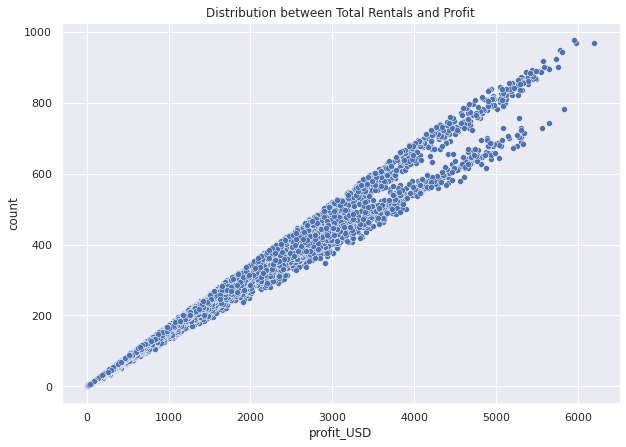

In [5]:
# 2. Distribution total rentals & profit
plt.title("Distribution between Total Rentals and Profit")
sns.scatterplot(x='profit_USD',y='count',data=df);

The Figure show there are hich correlation between counts and profit

In [6]:
df[['profit_USD','count']].describe()

,profit_USD,count
count,10886.000000,10886.000000
mean,1235.186657,191.574132
std,1177.842121,181.144454
min,5.593014,1.000000
25%,265.830514,42.000000
50%,918.573014,145.000000
75%,1843.013014,284.000000
max,6199.723014,977.000000


In [7]:
# 3. Profit for each day
df=extract_date_features(df)
df[['profit_USD','count','day_of_week']].groupby('day_of_week').describe().T

day_of_week            Friday       Monday     Saturday       Sunday  \
profit_USD count  1529.000000  1551.000000  1584.000000  1579.000000   
           mean   1251.938593  1204.805786  1369.803279  1254.010867   
           std    1088.422647  1128.649531  1326.185851  1204.756199   
           min       5.593014     5.593014     5.593014     5.593014   
           25%     324.563014   261.533014   289.228014   280.633014   
           50%    1067.553014   926.213014   902.338014   769.593014   
           75%    1860.203014  1797.173014  2175.830514  2060.753014   
           max    5760.423014  5970.523014  5823.453014  5309.663014   
count      count  1529.000000  1551.000000  1584.000000  1579.000000   
           mean    197.844343   190.390716   196.665404   180.839772   
           std     172.518208   180.943376   180.917795   167.022145   
           min       1.000000     1.000000     1.000000     1.000000   
           25%      52.000000    39.000000    45.000000    43.000000   
           50%     167.000000   146.000000   141.500000   119.000000   
           75%     290.000000   277.500000   309.500000   298.000000   
           max     900.000000   968.000000   783.000000   757.000000   

day_of_week          Thursday      Tuesday    Wednesday  
profit_USD count  1553.000000  1539.000000  1551.000000  
           mean   1222.077302  1174.761227  1165.492543  
           std    1151.522862  1142.131117  1173.082424  
           min       5.593014     5.593014     5.593014  
           25%     259.623014   222.378014   232.883014  
           50%     964.413014   907.113014   844.083014  
           75%    1787.623014  1736.053014  1705.493014  
           max    5636.273014  6199.723014  5945.693014  
count      count  1553.000000  1539.000000  1551.000000  
           mean    197.296201   189.723847   188.411348  
           std     187.606619   186.719673   190.942004  
           min       1.000000     1.000000     1.000000  
           25%      44.000000    36.000000    38.000000  
           50%     155.000000   146.000000   136.000000  
           75%     280.000000   274.000000   270.500000  
           max     901.000000   970.000000   977.000000

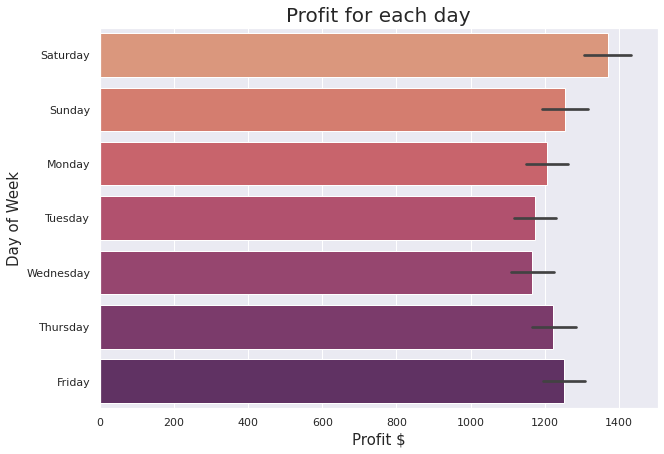

In [67]:
plt.title("Profit for each day",fontsize=20)
sns.barplot(x='profit_USD', y='day_of_week', data=df,palette='flare');
plt.xlabel("Profit $",fontsize=15)
plt.ylabel("Day of Week",fontsize=15)
plt.show()

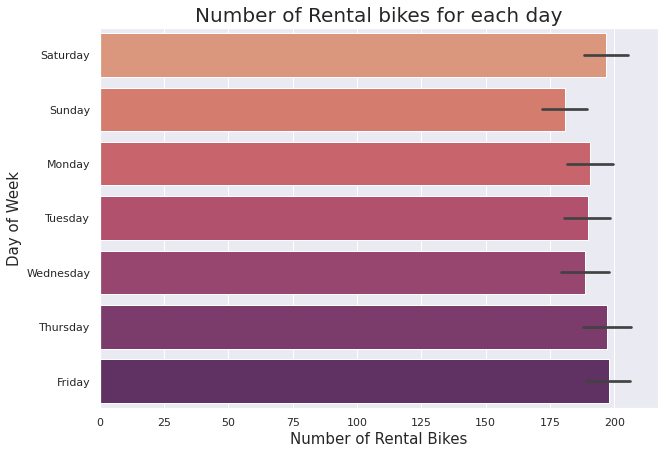

In [66]:
plt.title("Number of Rental bikes for each day",fontsize=20)
sns.barplot(x='count', y='day_of_week', data=df,palette='flare');
plt.xlabel("Number of Rental Bikes",fontsize=15)
plt.ylabel("Day of Week",fontsize=15)
plt.show()

Due to the weekend is Saturday and Sunday,  so they have the biggest profit , but not the highest rental nikes

In [10]:
# 4. which season that more registeration & profit.
df[['profit_USD','count','season']].groupby('season').describe().T

season                   fall       spring       summer       winter
profit_USD count  2733.000000  2686.000000  2733.000000  2734.000000
           mean   1542.554569   725.680080  1414.500006  1249.244733
           std    1282.323491   799.151000  1266.850576  1126.024393
           min       5.593014     5.593014     5.593014     5.593014
           25%     433.433014   146.933014   320.743014   317.400514
           50%    1296.753014   481.183014  1124.853014   994.973014
           75%    2310.963014  1019.803014  2108.503014  1845.878014
           max    6199.723014  5326.853014  5561.783014  5800.533014
count      count  2733.000000  2686.000000  2733.000000  2734.000000
           mean    234.417124   116.343261   215.251372   198.988296
           std     197.151001   125.273974   192.007843   177.622409
           min       1.000000     1.000000     1.000000     1.000000
           25%      68.000000    24.000000    49.000000    51.000000
           50%     195.000000    78.000000   172.000000   161.000000
           75%     347.000000   164.000000   321.000000   294.000000
           max     977.000000   801.000000   873.000000   948.000000

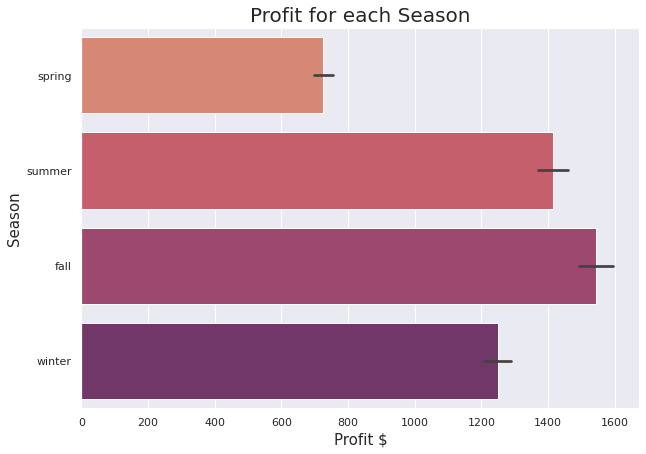

In [65]:
plt.title("Profit for each Season",fontsize=20)
sns.barplot(x='profit_USD', y='season', data=df,palette='flare');
plt.xlabel("Profit $",fontsize=15)
plt.ylabel("Season",fontsize=15)
plt.show()

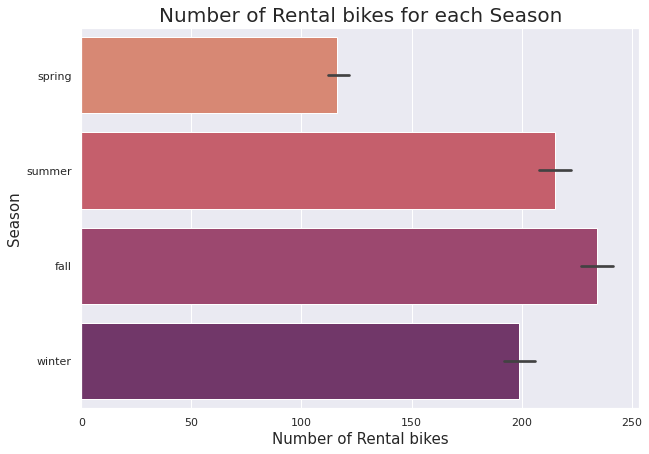

In [64]:
plt.title("Number of Rental bikes for each Season",fontsize=20)
sns.barplot(x='count', y='season', data=df,palette='flare');
plt.xlabel("Number of Rental bikes",fontsize=15)
plt.ylabel("Season",fontsize=15)
plt.show()

the biggest profit and the highest rentals were during summer and fall  

In [13]:
# 5. which weather condition that has more registeration & profit.

df[['profit_USD','count','weather']].groupby('weather').describe().T

weather                 clear       cloudy  heavy rain   light rain
profit_USD count  7192.000000  2834.000000    1.000000   859.000000
           mean   1329.848969  1142.878723  962.503014   747.482373
           std    1228.646490  1077.042498         NaN   881.189559
           min       5.593014     5.593014  962.503014     5.593014
           25%     297.823014   257.713014  962.503014   139.293014
           50%    1029.353014   845.038014  962.503014   437.253014
           75%    1978.623014  1697.853014  962.503014  1024.578014
           max    6199.723014  5823.453014  962.503014  5506.393014
count      count  7192.000000  2834.000000    1.000000   859.000000
           mean    205.236791   178.955540  164.000000   118.846333
           std     187.959566   168.366413         NaN   138.581297
           min       1.000000     1.000000  164.000000     1.000000
           25%      48.000000    41.000000  164.000000    23.000000
           50%     161.000000   134.000000  164.000000    71.000000
           75%     305.000000   264.000000  164.000000   161.000000
           max     977.000000   890.000000  164.000000   891.000000

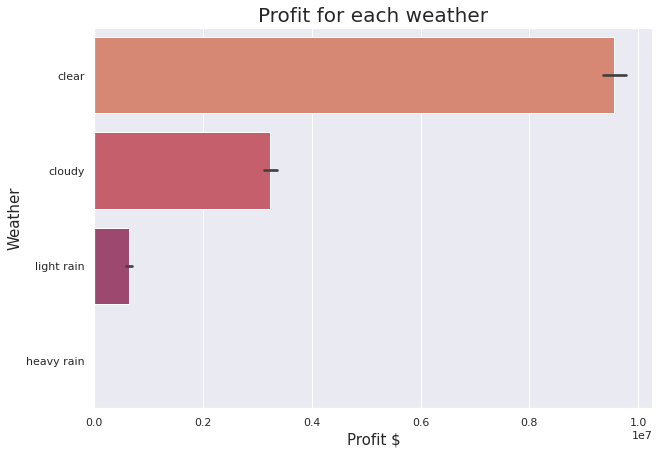

In [63]:
plt.title("Profit for each weather",fontsize=20)
sns.barplot(x='profit_USD', y='weather', data=df,estimator=sum,palette='flare');
plt.xlabel("Profit $",fontsize=15)
plt.ylabel("Weather",fontsize=15)
plt.show()

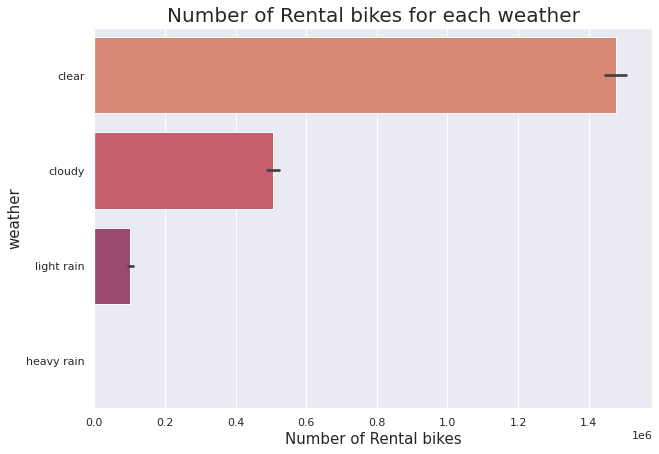

In [62]:
plt.title("Number of Rental bikes for each weather",fontsize=20)
sns.barplot(x='count', y='weather', data=df,estimator=sum,palette='flare');

plt.xlabel("Number of Rental bikes",fontsize=15)
plt.ylabel("weather",fontsize=15)
plt.show()

Its cleary that the more the weather is clear the more profit and rental bike number increase ,and we noticed that the data didn't have many recoreds at heavy rain (only one record)

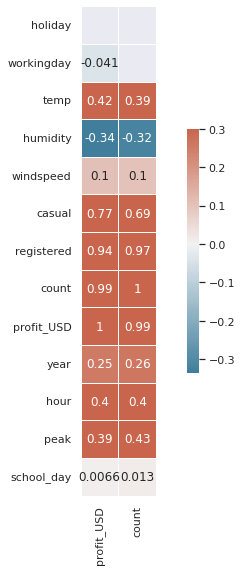

In [68]:
# 6. Correlation between profit & bikes count with all features
corr_matrix=df.corr()[['profit_USD','count']]

mask=np.triu(np.ones_like(corr_matrix,dtype=bool))
fig,ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(230,20,as_cmap=True,)
sns.heatmap(corr_matrix,mask=mask,cmap=cmap,vmax=.3,center=0,
           square=True,linewidths=.5,cbar_kws={'shrink':.5},annot=True);

In [17]:
# 7. Rentals during rush hours (7-9 am & 3-5 pm). https://www.enggarcia.com/blog/how-to-avoid-traffic-for-dc/
df['peak']=df['hour'].apply(lambda x: is_ruch_hour(x,[6,7,8,9,16,17,18,19]))
df[['profit_USD','count','peak']].groupby('peak').describe().T

peak                        0            1
profit_USD count  7242.000000  3644.000000
           mean    910.685099  1880.093431
           std     952.816468  1309.704748
           min       5.593014     5.593014
           25%     145.023014   774.845514
           50%     628.253014  1687.348014
           75%    1357.873014  2739.758014
           max    5640.093014  6199.723014
count      count  7242.000000  3644.000000
           mean    136.644297   300.740395
           std     135.720903   208.595671
           min       1.000000     1.000000
           25%      23.000000   126.000000
           50%      99.500000   272.500000
           75%     209.000000   433.250000
           max     757.000000   977.000000

The profit and bikes renal count  almost double in rush hours

In [18]:
# 8. Registered or casual is more ?
df.corr()[['profit_USD','count']].loc[['casual','registered']]


,profit_USD,count
casual,0.770451,0.690414
registered,0.936206,0.970948


We should make offer to attract users for registering

In [19]:
# 9. Is Schools days (9-12) & (2-6) effect in  profit?
df['school_day']=df['month'].apply(lambda x: is_school_day(x,[ 'February', 'March', 'April', 'May', 'June','September', 'October', 'November', 'December']))
df[['profit_USD','count','school_day']].groupby('school_day').describe().T

school_day                  0            1
profit_USD count  2708.000000  8178.000000
           mean   1221.606363  1239.683531
           std    1166.636046  1181.565873
           min       5.593014     5.593014
           25%     253.415514   271.083014
           50%     897.563014   922.393014
           75%    1898.403014  1825.823014
           max    5636.273014  6199.723014
count      count  2708.000000  8178.000000
           mean    187.598597   192.890560
           std     179.258377   181.756401
           min       1.000000     1.000000
           25%      40.000000    44.000000
           50%     139.000000   147.000000
           75%     282.000000   284.000000
           max     897.000000   977.000000

School days were not affected much and we knew that customers are not only students

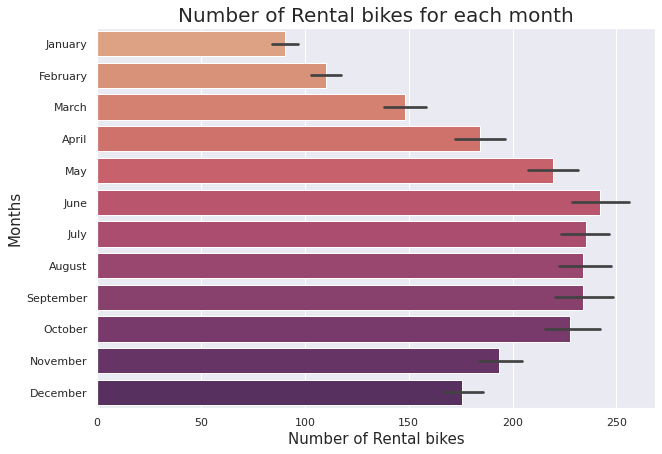

In [60]:
# 10. Which months the highest profit and rental bikes ?
sns.barplot(y='month', x='count', data=df,palette='flare');
plt.title("Number of Rental bikes for each month",fontsize=20)

plt.xlabel("Number of Rental bikes",fontsize=15)
plt.ylabel("Months",fontsize=15)
plt.show()

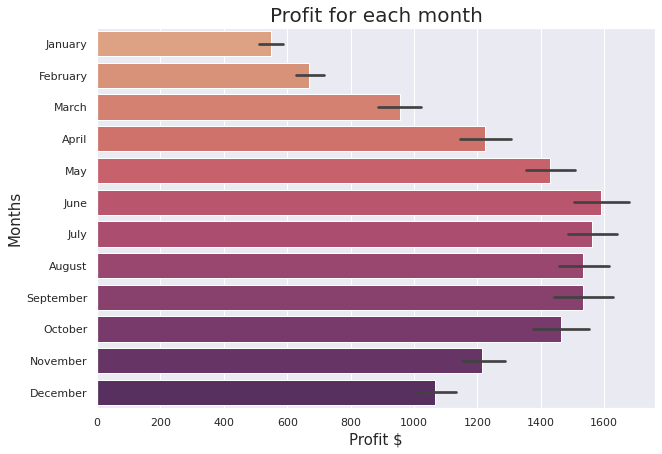

In [59]:
sns.barplot(y='month', x='profit_USD', data=df,palette='flare');
plt.title("Profit for each month",fontsize=20)

plt.xlabel("Profit $",fontsize=15)
plt.ylabel("Months",fontsize=15)
plt.show()

We observe from figures that from june to october have the highes numbers of rental bikes and the biggest profit

## Lets make more Visualization to get more insights

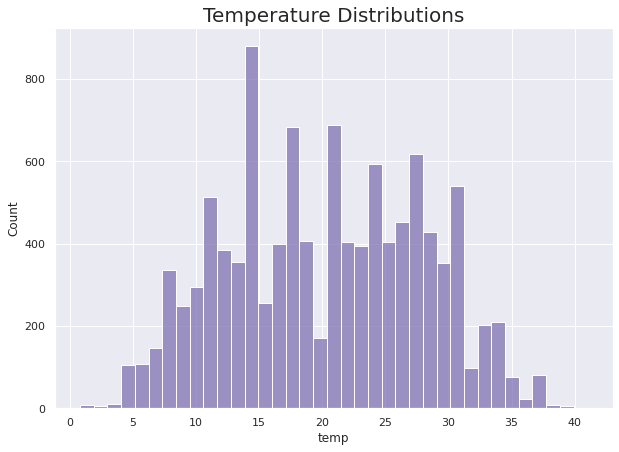

In [72]:
sns.histplot(df['temp'],kde=False,color='m');
plt.title("Temperature Distributions",fontsize=20);
plt.show()

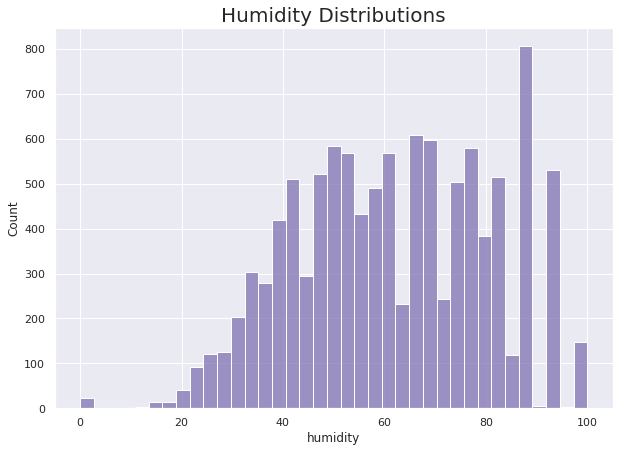

In [23]:
sns.histplot(df['humidity'],kde=False,color='m');
plt.title("Humidity Distributions",fontsize=20)

plt.show()

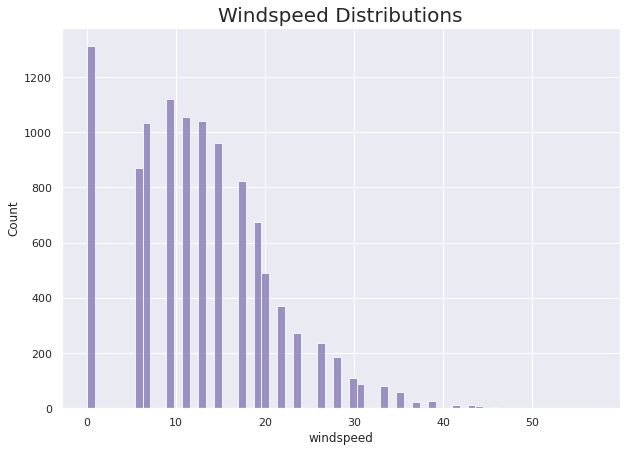

In [24]:
sns.histplot(df['windspeed'],kde=False,color='m');
plt.title("Windspeed Distributions",fontsize=20)

plt.show()

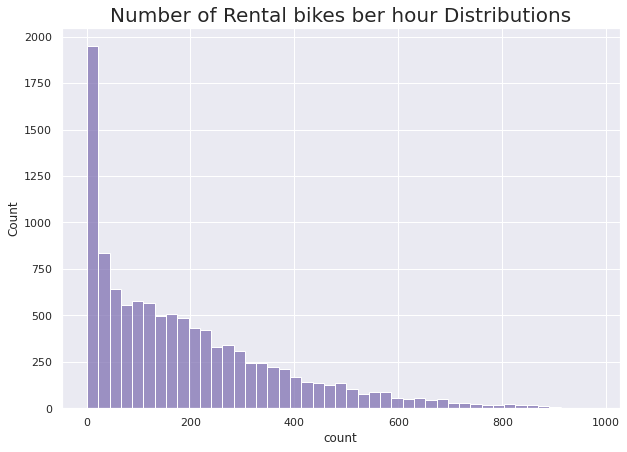

In [25]:
sns.histplot(df['count'],kde=False,color='m');
plt.title("Number of Rental bikes ber hour Distributions",fontsize=20)

plt.show()

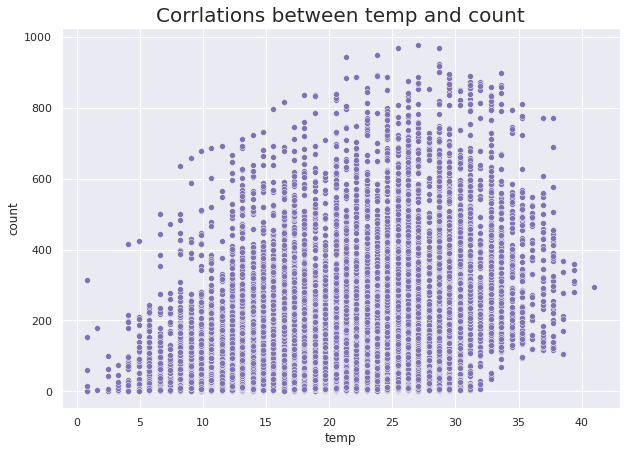

In [26]:
sns.scatterplot(x='temp',y='count',color='m',data=df);
plt.title("Corrlations between temp and count",fontsize=20)

plt.show()

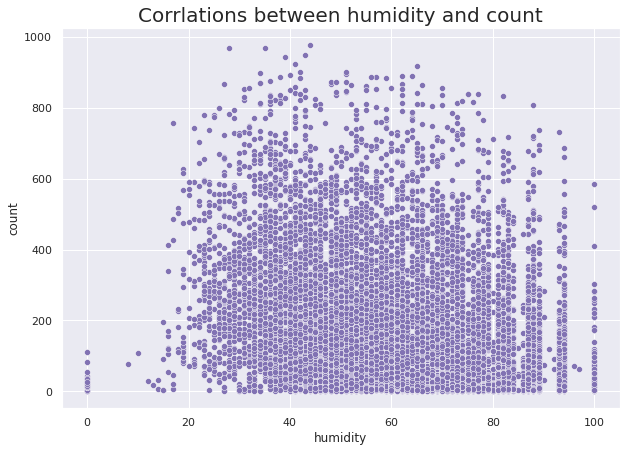

In [27]:
sns.scatterplot(x='humidity',y='count',color='m',data=df);
plt.title("Corrlations between humidity and count",fontsize=20)

plt.show()

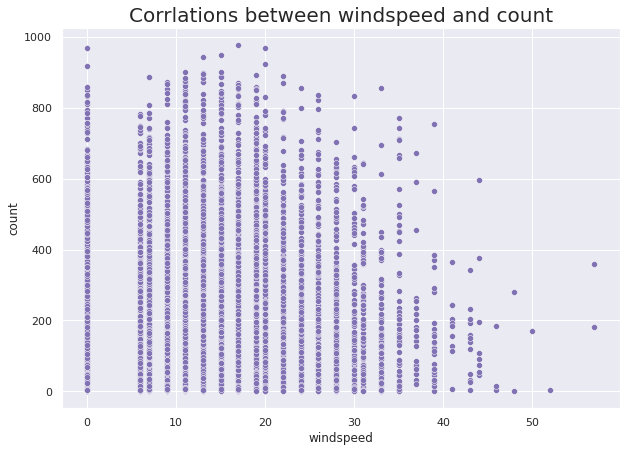

In [28]:
sns.scatterplot(x='windspeed',y='count',color='m',data=df);
plt.title("Corrlations between windspeed and count",fontsize=20)

plt.show()

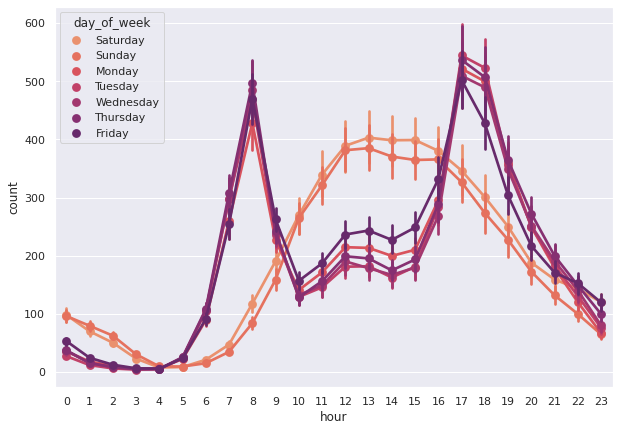

In [57]:
sns.pointplot(data=df, x='hour', y='count', hue='day_of_week',palette='flare');



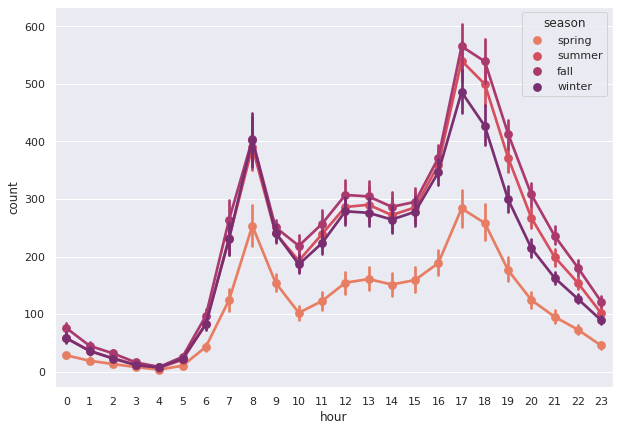

In [56]:
sns.pointplot(data=df, x='hour', y='count', hue='season',palette='flare');


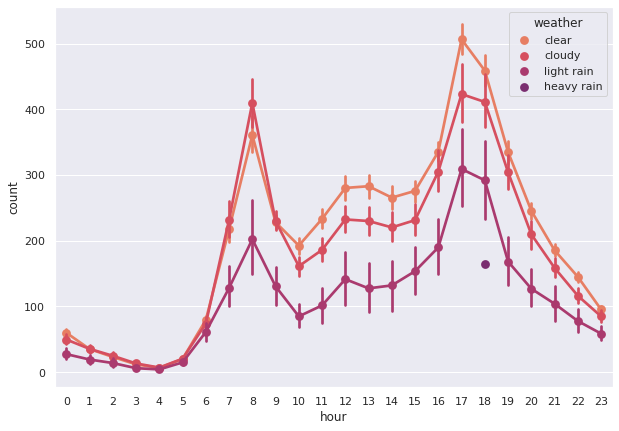

In [55]:
sns.pointplot(data=df, x='hour', y='count', hue='weather',join=True,palette='flare');


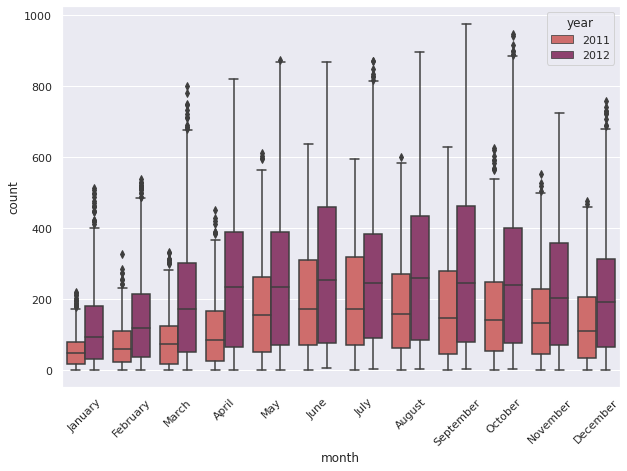

In [54]:
sns.boxplot(data=df,y="count",x="month",hue='year', orient="v",palette='flare');
plt.xticks(rotation=45);

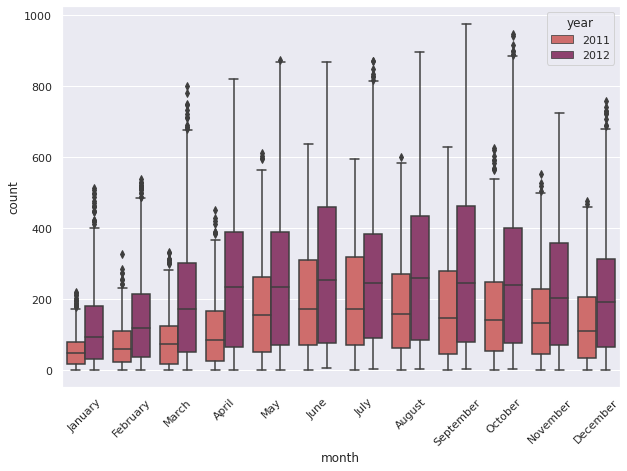

In [53]:
sns.boxplot(data=df, x='month', y='count', hue='year',palette='flare');
plt.xticks(rotation=45);

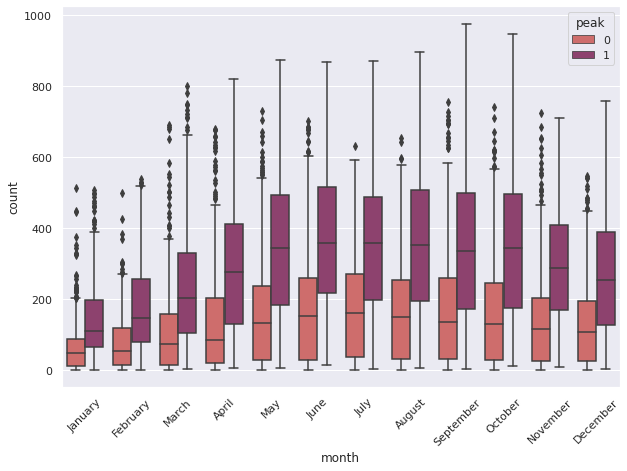

In [52]:
sns.boxplot(data=df,y="count",x="month",hue='peak', orient="v",palette='flare');
plt.xticks(rotation=45);

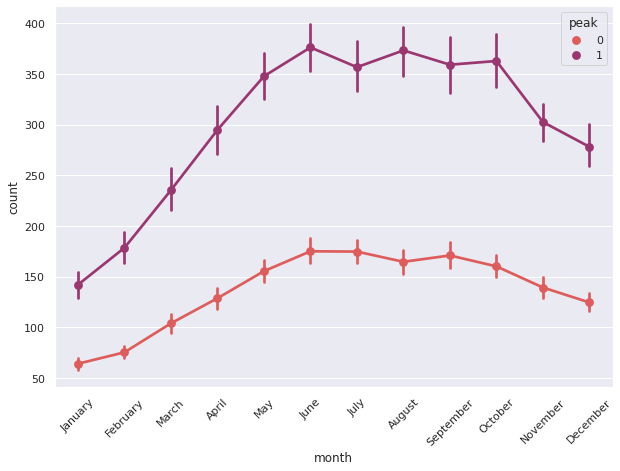

In [51]:
sns.pointplot(data=df, x='month', y='count', hue='peak',join=True,palette='flare');
plt.xticks(rotation=45);

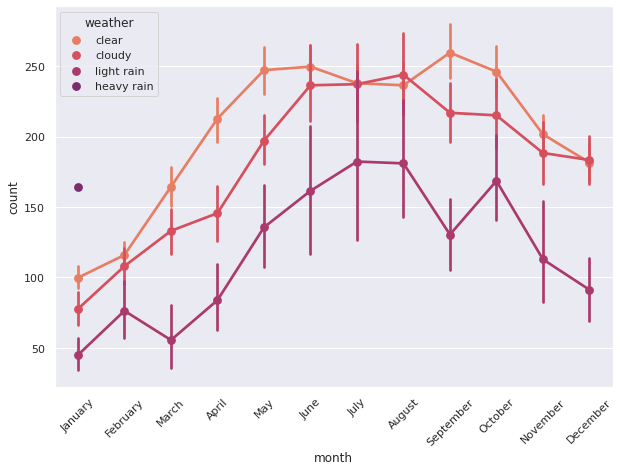

In [50]:
sns.pointplot(data=df, x='month', y='count', hue='weather',join=True,palette='flare');
plt.xticks(rotation=45);

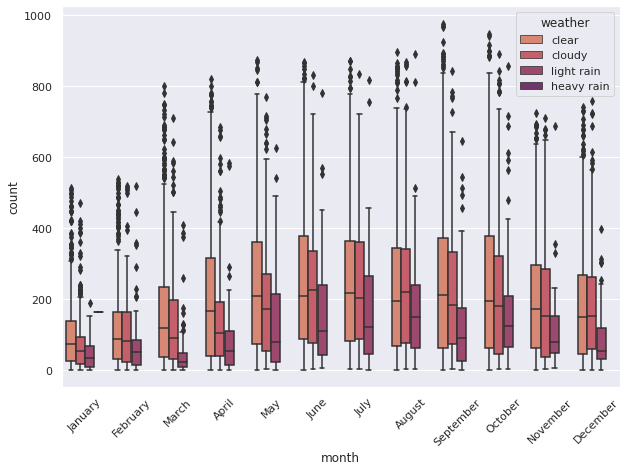

In [49]:
sns.boxplot(data=df,y="count",x="month",hue='weather', orient="v",palette='flare');
plt.xticks(rotation=45);

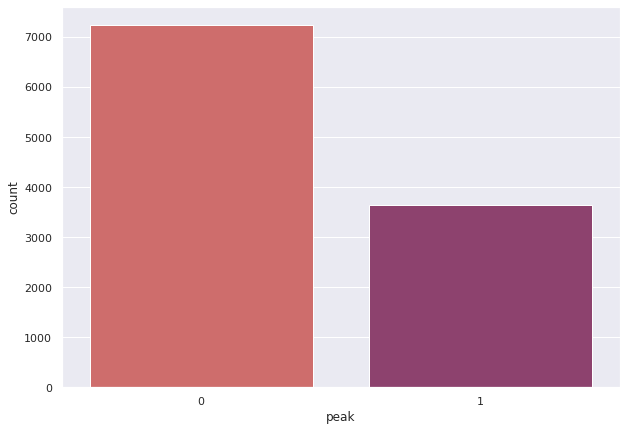

In [58]:
sns.countplot(x='peak',data=df,palette='flare');

In [39]:
df[df['peak']==0][['registered','casual','count']].describe()

,registered,casual,count
count,7242.000000,7242.000000,7242.000000
mean,103.175642,33.468655,136.644297
std,93.645755,50.172512,135.720903
min,0.000000,0.000000,1.000000
25%,19.000000,3.000000,23.000000
50%,82.000000,13.000000,99.500000
75%,163.000000,44.000000,209.000000
max,510.000000,362.000000,757.000000


In [40]:
df[df['peak']==1][['registered','casual','count']].describe()

,registered,casual,count
count,3644.000000,3644.000000,3644.000000
mean,259.644072,41.096323,300.740395
std,185.581628,49.150961,208.595671
min,0.000000,0.000000,1.000000
25%,111.000000,8.000000,126.000000
50%,226.500000,23.000000,272.500000
75%,365.000000,58.000000,433.250000
max,886.000000,367.000000,977.000000


Although the number of samples we have is not at the peaks hours, but the number of rented bikes is more at the peaks hours

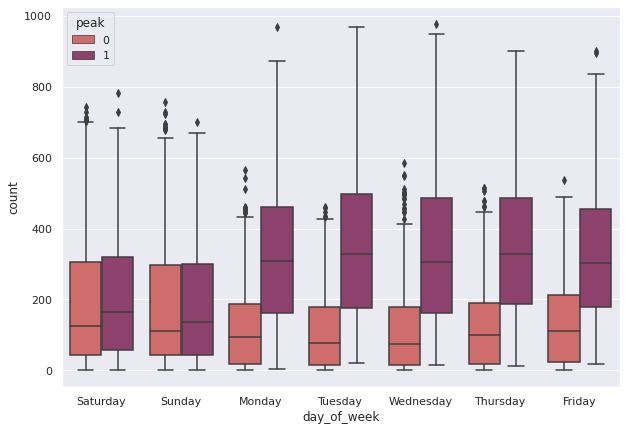

In [48]:
sns.boxplot(data=df,y="count",x="day_of_week",hue='peak', orient="v",palette='flare');


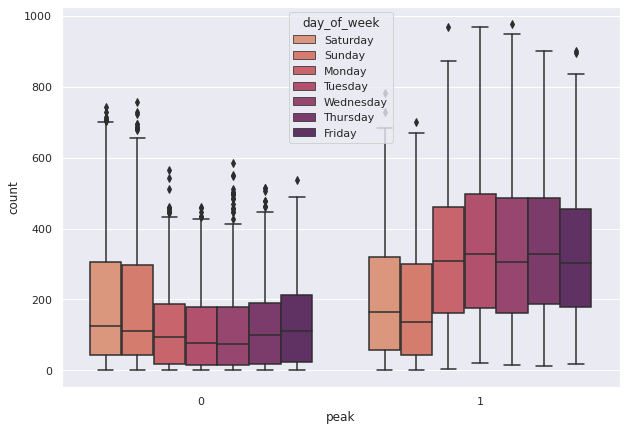

In [47]:
sns.boxplot(data=df,y="count",x="peak",hue='day_of_week', orient="v",palette='flare');


Peak time is more evident, and its effect is more on working days than on weekend days

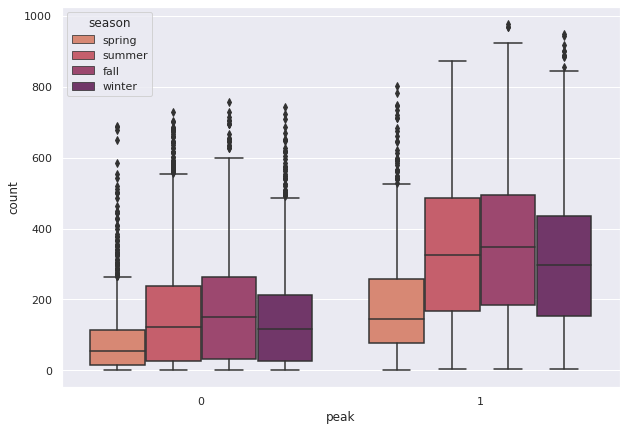

In [73]:
sns.boxplot(data=df,y="count",x="peak",hue='season', orient="v",palette='flare');


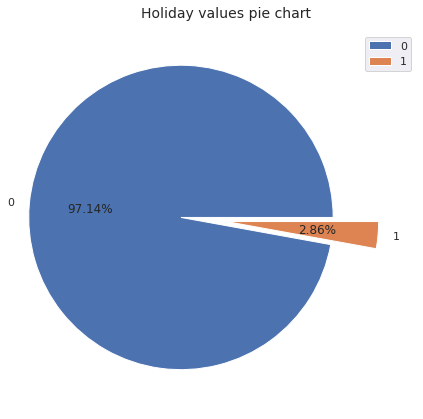

In [77]:
plt.pie(df.holiday.value_counts(),
        labels=df.holiday.unique(),
        explode=[0.3,0],
        autopct='%1.2f%%',
        )

plt.title("Holiday values pie chart", y=1.02, fontsize=14)
plt.legend()
plt.show()



In [74]:
df.to_pickle("./dataset/bikes_v1.p")